# Optimization of a State-to-State Transfer for a Quantum Charger-Battery Driven by Laser Field Using Krotov's Method

In [20]:
!pip install dill

  Using cached dill-0.3.4-py2.py3-none-any.whl (86 kB)


ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'c:\\python39\\Scripts\\get_objgraph'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# NBVAL_IGNORE_OUTPUT
import qutip
import numpy as np
import scipy
import matplotlib
import matplotlib.pylab as plt
from src import krotov
from src.krotov import fidelity_sq as inte




$\newcommand{tr}[0]{\operatorname{tr}}
\newcommand{diag}[0]{\operatorname{diag}}
\newcommand{abs}[0]{\operatorname{abs}}
\newcommand{pop}[0]{\operatorname{pop}}
\newcommand{aux}[0]{\text{aux}}
\newcommand{opt}[0]{\text{opt}}
\newcommand{tgt}[0]{\text{tgt}}
\newcommand{init}[0]{\text{init}}
\newcommand{lab}[0]{\text{lab}}
\newcommand{rwa}[0]{\text{rwa}}
\newcommand{bra}[1]{\langle#1\vert}
\newcommand{ket}[1]{\vert#1\rangle}
\newcommand{Bra}[1]{\left\langle#1\right\vert}
\newcommand{Ket}[1]{\left\vert#1\right\rangle}
\newcommand{Braket}[2]{\left\langle #1\vphantom{#2}\mid{#2}\vphantom{#1}\right\rangle}
\newcommand{op}[1]{\hat{#1}}
\newcommand{Op}[1]{\hat{#1}}
\newcommand{dd}[0]{\,\text{d}}
\newcommand{Liouville}[0]{\mathcal{L}}
\newcommand{DynMap}[0]{\mathcal{E}}
\newcommand{identity}[0]{\mathbf{1}}
\newcommand{Norm}[1]{\lVert#1\rVert}
\newcommand{Abs}[1]{\left\vert#1\right\vert}
\newcommand{avg}[1]{\langle#1\rangle}
\newcommand{Avg}[1]{\left\langle#1\right\rangle}
\newcommand{AbsSq}[1]{\left\vert#1\right\vert^2}
\newcommand{Re}[0]{\operatorname{Re}}
\newcommand{Im}[0]{\operatorname{Im}}$

This first example illustrates the basic use of the `krotov` package by solving
a simple canonical optimization problem: the transfer of population in a two
level system.

## Hamiltonian

In [3]:
import dill 
dill.settings['recurse'] = True

H0=dill.load(open("H_0", "rb"))
He=dill.load(open("H_campo","rb"))

g=0.2, T=100,target= np.sqrt(2), np.sqrt(2),0,5 * np.sqrt(2), nt=100 it is good

iter.      J_T    ∫gₐ(t)dt          J       ΔJ_T         ΔJ  secs
0     8.90e-01    0.00e+00   8.90e-01        n/a        n/a     0
1     8.87e-01    7.91e-05   8.87e-01  -2.47e-03  -2.39e-03     0
2     8.85e-01    8.58e-05   8.85e-01  -2.57e-03  -2.48e-03     0
3     8.82e-01    9.32e-05   8.82e-01  -2.67e-03  -2.57e-03     0
4     8.79e-01    1.02e-04   8.80e-01  -2.77e-03  -2.67e-03     0
5     8.77e-01    1.11e-04   8.77e-01  -2.87e-03  -2.76e-03     0
6     8.74e-01    1.22e-04   8.74e-01  -2.97e-03  -2.85e-03     0
7     8.71e-01    1.34e-04   8.71e-01  -3.06e-03  -2.93e-03     0
8     8.67e-01    1.48e-04   8.67e-01  -3.15e-03  -3.01e-03     0
9     8.64e-01    1.63e-04   8.64e-01  -3.24e-03  -3.07e-03     0
10    8.61e-01    1.81e-04   8.61e-01  -3.31e-03  -3.13e-03     0
11    8.57e-01    2.02e-04   8.58e-01  -3.37e-03  -3.16e-03     0
12    8.54e-01    2.25e-04   8.54e-01  -3.41e-03  -3.18e-03     0
13    8.51e-01    2.52e-04   8.51e-01  -3.42e-03  -3.17e-03     1
14    8.47

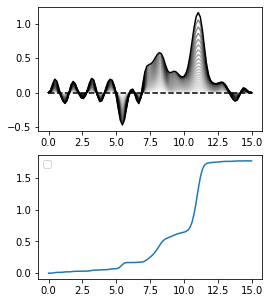

In [5]:
omega=1
ampl0=0.000001
#T=8
mu=0.5
g=0.2*omega
#ampl0=1
T=15
nt=100
tlist = np.linspace(0,T, nt)
gamma=1/1000
Temp=0

#Nb=0
def hamiltonian(omega, ampl0, mu,g,gamma,Nb):
      """Two-level-system Hamiltonian

      Args:
          omega (float): energy separation of the qubit levels
          ampl0 (float): constant amplitude of the driving field
      """
      HA = qutip.Qobj(H0(g,gamma,Nb))
      H1= qutip.Qobj(He(mu))
      def guess_control(t, args):
          return ampl0*krotov.shapes.flattop(
              t, t_start=0, t_stop=T, t_rise=0.005, func="blackman"
          )
      def guess_control2(t, args):
          return ampl0*krotov.shapes.flattop(
              t, t_start=0, t_stop=T, t_rise=0.005, func="blackman"
          )
      
      return [HA, [H1, guess_control]]
def S(t):
    """Shape function for the field update"""
    return krotov.shapes.flattop(
        t, t_start=0, t_stop=T, t_rise=0.05 * T, t_fall=0.05 * T, func='sinsq'
    )
def plot_iterations(opt_result):
    """Plot the control fields in population dynamics over all iterations.

    This depends on ``store_all_pulses=True`` in the call to
    `optimize_pulses`.
    """

    fig, [ax_ctr,ax] = plt.subplots(nrows=2, figsize=(4, 5))
    n_iters = len(opt_result.iters)
    EEnergy=np.zeros(nt)
    for (iteration, pulses) in zip(opt_result.iters, opt_result.all_pulses):
        controls = [
            krotov.conversions.pulse_onto_tlist(pulse)
            for pulse in pulses
        ]
        objectives = opt_result.objectives_with_controls(controls)
        dynamics = objectives[0].mesolve(
            opt_result.tlist, e_ops=[]
        )
        if iteration == 0:
            ls = '--'  # dashed
            alpha = 1  # full opacity
            ctr_label = 'guess'
            pop_labels = ['0 (guess)', '1 (guess)']
        elif iteration == opt_result.iters[-1]:
            ls = '-'  # solid
            alpha = 1  # full opacity
            ctr_label = 'optimized'
            pop_labels = ['0 (optimized)', '1 (optimized)']
        else:
            ls = '-'  # solid
            alpha = 0.5 * float(iteration) / float(n_iters)  # max 50%
            ctr_label = None
            pop_labels = [None, None]
        ax_ctr.plot(
            dynamics.times,
            controls[0],
            label=ctr_label,
            color='black',
            ls=ls,
            alpha=alpha,
        )
    EField=np.transpose(np.array(opt_result.optimized_controls))
    EEnergy[0]=(np.square(EField[0]))*(T/nt)
    a=0
    for i in range (1,nt):
      a+=np.square(EField[i-1])
      EEnergy[i]=(np.square(EField[i])+a)*(T/nt)
      
    
    ax.plot(tlist,np.transpose(EEnergy))
    plt.legend()
    plt.show(fig)
    
 
    
#Nb=1/(np.exp(omega/Temp)-1)
Nb=0
H = hamiltonian(omega,ampl0,mu,g,gamma,Nb)
pulse_options = {
        H[1][1]: dict(lambda_a=0.1, update_shape=S), 
    }
    #target=np.array([1,0, np.sqrt(2),0,np.sqrt(2),1/2,0,0,0,1/2,0,0,1/2,0,1/2])

target=np.array([1,0, np.sqrt(2),0,np.sqrt(2),1/2,0,0,0,1/2,0,0,1/2,0,1/2])

#r2=np.pi/4
#theta=np.pi/2

#target=qutip.Qobj(np.array([1,0,0,0,0,1/2*np.cosh(2*r2),0,-1/2*np.sinh(2*r2)*np.cos(theta),-1/2*np.sinh(2*r2)*np.sin(theta),1/2*np.cosh(2*r2),-1/2*np.sinh(2*r2)*np.sin(theta),1/2*np.sinh(2*r2)*np.cos(theta),1/2*np.cosh(2*r2),0,1/2*np.cosh(2*r2)])) 

r=np.pi/4
r2=np.pi/8
theta=np.pi/4

objectives = [krotov.Objective(
    #initial_state=qutip.Qobj(np.array([1,0,0,0,0,1/2,0,0,0,1/2,0,0,1/2,0,1/2])),
            initial_state=qutip.Qobj(np.array([1,0,0,0,0,1/2*np.cosh(2*r2),0,-1/2*np.sinh(2*r2)*np.cos(theta),-1/2*np.sinh(2*r2)*np.sin(theta),1/2*np.cosh(2*r2),-1/2*np.sinh(2*r2)*np.sin(theta),1/2*np.sinh(2*r2)*np.cos(theta),1/2*np.cosh(2*r2),0,1/2*np.cosh(2*r2)])),
    target=qutip.Qobj(target), H=H
          )
      ]

opt_result = krotov.optimize_pulses(
      objectives,
      pulse_options=pulse_options,
      tlist=tlist,
      fieldcoupling=mu,
      propagator=krotov.propagators.expm,
      chi_constructor=krotov.functionals.chis_ss,
      info_hook=krotov.info_hooks.print_table(J_T=krotov.functionals.J_T_ss),
      check_convergence=krotov.convergence.Or(
          krotov.convergence.value_below('9e-4', name='J_T'),
          krotov.convergence.check_monotonic_error,
      ),
        iter_stop=30,
        store_all_pulses=True,
        overlap=inte,norm=lambda x: 1
    )

plot_iterations(opt_result)

    

    
   
    

In [6]:
opt_result.states[0][0]

Quantum object: dims = [[15], [1]], shape = (15, 1), type = ket
Qobj data =
[[ 1.00000000e+00]
 [-2.72259372e-02]
 [ 4.95676396e-01]
 [-2.49730196e-01]
 [-2.31814000e-01]
 [ 4.99951318e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.40293074e-07]
 [ 4.99946544e-01]
 [ 3.40293072e-07]
 [ 0.00000000e+00]
 [ 4.99951318e-01]
 [ 0.00000000e+00]
 [ 4.99946544e-01]]

In [34]:
for i in range(0,nt):
    a=opt_result.states[0][i]
    A=np.array([[a[5,0],a[6,0],a[7,0],a[8,0]],[a[6,0],a[9,0],a[10,0],a[11,0]],[a[7,0],a[10,0],a[12,0],a[13,0]],[a[8,0],a[11,0],a[13,0],a[14,0]]])
    print(1/(np.sqrt(np.linalg.det(2*A))))

(1+0j)
(0.9998236878688582+0j)
(0.9996474645346438+0j)
(0.9994713297735056+0j)
(0.9992952832567578+0j)
(0.9991193245520735+0j)
(0.998943453125058+0j)
(0.9987676683411918+0j)
(0.9985919694681453+0j)
(0.9984163556784448+0j)
(0.9982408260524883+0j)
(0.9980653795818987+0j)
(0.9978900151731931+0j)
(0.9977147316517699+0j)
(0.9975395277661854+0j)
(0.9973644021927085+0j)
(0.9971893535401383+0j)
(0.9970143803548661+0j)
(0.9968394811261602+0j)
(0.9966646542916567+0j)
(0.9964898982430359+0j)
(0.996315211331862+0j)
(0.996140591875564+0j)
(0.99596603816354+0j)
(0.9957915484633562+0j)
(0.9956171210270213+0j)
(0.995442754097315+0j)
(0.995268445914143+0j)
(0.9950941947208967+0j)
(0.9949199987707978+0j)
(0.9947458563331988+0j)
(0.9945717656998191+0j)
(0.9943977251908962+0j)
(0.9942237331612241+0j)
(0.9940497880060627+0j)
(0.993875888166891+0j)
(0.9937020321369878+0j)
(0.9935282184668178+0j)
(0.9933544457692012+0j)
(0.9931807127242525+0j)
(0.9930070180840662+0j)
(0.9928333606771368+0j)
(0.99265973941249

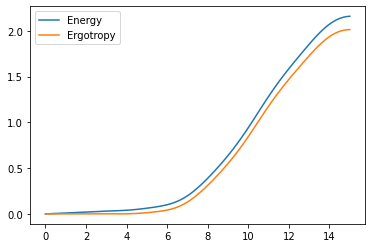

0.9324641559612569


In [4]:
psi=opt_result.states[0]
Energy=np.zeros(nt)
Ergotropy=np.zeros(nt)
for i in range (0,nt):
    Energy[i]=1/2*(np.real(psi[i][5])+np.real(psi[i][14])+(np.real(psi[i][2]))**2+(np.real(psi[i][4]))**2)-1/2
    D=np.real((1+2*np.real(Energy[i])-np.abs(np.real(psi[i][2])+1j*np.real(psi[i][4]))**2)**2-4*np.abs(1/2*(np.real(psi[i][9])+np.real(psi[i][2])**2-(np.real(psi[i][14])+np.real(psi[i][4])**2)+1j*2*(np.real(psi[i][11])+np.real(psi[i][2])*np.real(psi[i][4])))-1/2*(np.real(psi[i][2])+1j*np.real(psi[i][4]))**2)**2)
    Ergotropy[i]=np.real(Energy[i]-(np.sqrt(D)-1)/2)
plt.plot(opt_result.tlist,Energy,label="Energy")
plt.plot(opt_result.tlist,Ergotropy,label="Ergotropy")
plt.legend()

plt.show()

print(Ergotropy[nt-1]/Energy[nt-1])

In [16]:
for i in range(0,nt):
    print(opt_result.states[0][i][9]*opt_result.states[0][i][14])

[[0.25+0.j]]
[[0.25005626+0.j]]
[[0.25044607+0.j]]
[[0.25148438+0.j]]
[[0.25345197+0.j]]
[[0.25658303+0.j]]
[[0.26105546+0.j]]
[[0.26698322+0.j]]
[[0.27441031+0.j]]
[[0.28330645+0.j]]
[[0.2935645+0.j]]
[[0.30500081+0.j]]
[[0.3173594+0.j]]
[[0.33032107+0.j]]
[[0.34351806+0.j]]
[[0.35655433+0.j]]
[[0.36903038+0.j]]
[[0.38057086+0.j]]
[[0.39085259+0.j]]
[[0.39962996+0.j]]
[[0.40675501+0.j]]
[[0.41219009+0.j]]
[[0.41601149+0.j]]
[[0.418404+0.j]]
[[0.41964711+0.j]]
[[0.42009471+0.j]]
[[0.4201504+0.j]]
[[0.4202412+0.j]]
[[0.42079165+0.j]]
[[0.42220025+0.j]]
[[0.42481904+0.j]]
[[0.42893703+0.j]]
[[0.43476703+0.j]]
[[0.44243586+0.j]]
[[0.45197737+0.j]]
[[0.46332854+0.j]]
[[0.47632888+0.j]]
[[0.49072399+0.j]]
[[0.50617409+0.j]]
[[0.52226838+0.j]]
[[0.53854535+0.j]]
[[0.55451883+0.j]]
[[0.56970822+0.j]]
[[0.58367095+0.j]]
[[0.59603422+0.j]]
[[0.60652312+0.j]]
[[0.61498211+0.j]]
[[0.62138777+0.j]]
[[0.62585132+0.j]]
[[0.62861098+0.j]]
[[0.63001498+0.j]]
[[0.63049728+0.j]]
[[0.6305484+0.j]]
[[0.63

In [26]:
omega=1
ampl0=0.00001
#T=8
mu=0.05
g=0.2*omega
#ampl0=1
T=60
nt=100000
tlist = np.linspace(0,T, nt)
gamma=1/500
Temp=10
Nb=1/(np.exp(omega/Temp)-1)
H = hamiltonian(omega,ampl0,mu,g,gamma,Nb)

In [6]:
HH=H[0]+H[1][0]*2
initial=qutip.Qobj(target)
t=np.linspace(0,T,nt)
dt=t[1]-t[0]
psi=(-1*HH*dt).expm()*target
phi=(1*HH*dt).expm()*psi
print(psi[12]*psi[5])
print(psi)
print(phi)
a=psi-phi
phi=(1*HH.dag()*dt).expm()*psi
b=psi-phi
print(phi[9]*phi[14])
print(phi[12]*phi[5])


(0.9126174682612764+0j)
[ 1.        +0.j  0.29398224+0.j  2.00069454+0.j  0.56559684+0.j
  0.33394542+0.j  0.43570454+0.j -0.73910825+0.j -0.10254632+0.j
 -0.27778806+0.j  1.94794871+0.j -0.27650899+0.j  0.46844397+0.j
  2.09457873+0.j  0.73910825+0.j  0.56133335+0.j]
[ 1.00000000e+00+0.j -4.16333634e-17+0.j  1.41421356e+00+0.j
  4.85722573e-17+0.j  1.41421356e+00+0.j  1.25458924e+00+0.j
 -6.93889390e-18+0.j -8.13632030e-01+0.j -8.13632030e-01+0.j
  1.25458924e+00+0.j -8.13632030e-01+0.j  8.13632030e-01+0.j
  1.25458924e+00+0.j  1.52655666e-16+0.j  1.25458924e+00+0.j]
(1.2913781313423702+0j)
(1.531002684419479+0j)


In [28]:
print(a)
print(b)

[ 0.00000000e+00+0.j  1.69630874e-04+0.j  8.48276911e-04+0.j
 -8.49554365e-05+0.j -8.48801314e-04+0.j -1.16113553e-03+0.j
 -9.76367292e-04+0.j  1.79652406e-06+0.j  1.09681300e-06+0.j
  7.81094526e-04+0.j  1.09807356e-06+0.j -3.51496130e-07+0.j
  1.18214470e-03+0.j  9.76367292e-04+0.j -7.81094526e-04+0.j]
[ 3.01213805e-05+0.j -1.69452697e-04+0.j -8.47752168e-04+0.j
  1.70012718e-04+0.j  8.49330474e-04+0.j  5.84315076e-04+0.j
  9.76366833e-04+0.j -2.89008763e-06+0.j -1.38375865e-06+0.j
 -3.90546709e-04+0.j -1.38916224e-06+0.j  1.99181084e-06+0.j
 -5.87326147e-04+0.j -9.76366833e-04+0.j  3.90546709e-04+0.j]


In [4]:
opt_result.states[0][nt-1][12]*opt_result.states[0][nt-1][5]

array([[0.17241739+0.j]])

In [9]:
z=qutip.Qobj([[  1.        ],
 [ -3.09624997],
 [  0.19202116],
 [ -1.15436765],
 [ -0.49805424],
 [-11.12673451],
 [  0.        ],
 [  0.        ],
 [ -8.5370321 ],
 [ -8.50412931],
 [  8.5370321 ],
 [  0.        ],
 [-11.12673451],
 [  0.        ]])

In [4]:
opt_result

Krotov Optimization Result
--------------------------
- Started at 2022-03-24 12:07:08
- Number of objectives: 1
- Number of iterations: 2
- Reason for termination: Reached convergence: Loss of monotonic convergence; error decrease < 0
- Ended at 2022-03-24 12:07:09 (0:00:01)

In [24]:
np.sqrt(z[5,0]-z[1,0]**2)*np.sqrt(z[9,0]-z[3,0]**2)

(-14.27418456212974+0j)

In [26]:
z=qutip.Qobj([[  1.        ],
 [ -3.09624997],
 [  0.19202116],
 [ -1.15436765],
 [ -0.49805424],
 [-11.12673451],
 [  0.        ],
 [  0.        ],
 [ -8.5370321 ],
 [ -8.50412931],
 [  8.5370321 ],
 [  0.        ],
 [-11.12673451],
 [  0.        ],
 [ -8.50412931]])

In [27]:
np.sqrt(z[5,0]-z[1,0]**2)*np.sqrt(z[9,0]-z[3,0]**2)

(-14.27418456212974+0j)

C:\Users\ricar\anaconda3\lib\site-packages\numpy\ma\core.py:2825: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


[array([[0.01092862]]), 0.0] [array([[-0.0039153]]), 0.0]


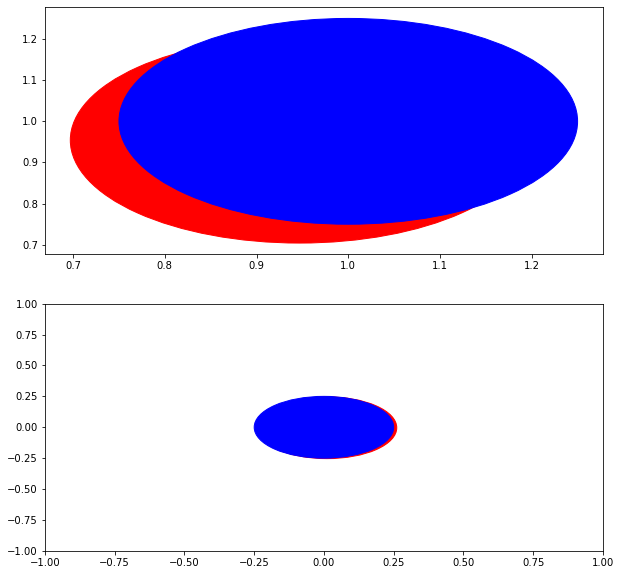

In [16]:
psi=opt_result.states[0]
circle1=plt.Circle((1/np.sqrt(2)*np.real(psi[nt-1][2]), 1/np.sqrt(2)*np.real(psi[nt-1][4])), 0.25, color='r')
circle2=plt.Circle((1/np.sqrt(2)*target[2], 1/np.sqrt(2)*target[4]), 0.25, color='b')

fig, ax = plt.subplots(2,figsize=(10,10)) 

x=[1/np.sqrt(2)*np.real(psi[nt-1][2]),1/np.sqrt(2)*target[2]]
y=[1/np.sqrt(2)*np.real(psi[nt-1][4]),1/np.sqrt(2)*target[4]]



ax[0].scatter(x,y)
ax[0].add_patch(circle1)
ax[0].add_patch(circle2)
#ax[0].set_ylim([-1, 2.5])
#ax[0].set_xlim([-1, 2.5])



x=[1/np.sqrt(2)*np.real(psi[nt-1][1]),1/np.sqrt(2)*target[1]]
y=[1/np.sqrt(2)*np.real(psi[nt-1][3]),1/np.sqrt(2)*target[3]]

print(x,y)


circle3=plt.Circle((1/np.sqrt(2)*np.real(psi[nt-1][1]), 1/np.sqrt(2)*np.real(psi[nt-1][3])), 0.25, color='r')
circle4=plt.Circle((1/np.sqrt(2)*target[1], 1/np.sqrt(2)*target[3]), 0.25, color='b')

ax[1].scatter(x,y)
ax[1].add_patch(circle3)
ax[1].add_patch(circle4)
ax[1].set_ylim([-1, 1])
ax[1].set_xlim([-1, 1])
plt.show()

Function to get the states at each t for optimized field

In [3]:
integral(qutip.Qobj(np.array([1,0,0,0,0,1/2,0,0,0,1/2,0,0,1/2,0,1/2])),qutip.Qobj(np.array([1,0,0,0,0,1/2,0,0,0,1/2,0,0,1/2,0,1/2])))

0j


(0.028582178201868143+0j)